**Building a Loan Approval Prediction System using Machine Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
# Define the path to the Excel file
file_path = 'Copy of loan.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Create a new column 'LoanAmount_log' by applying the natural logarithm to 'LoanAmount'
# Use np.log to apply the natural logarithm
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Check the first few rows to see the new column
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


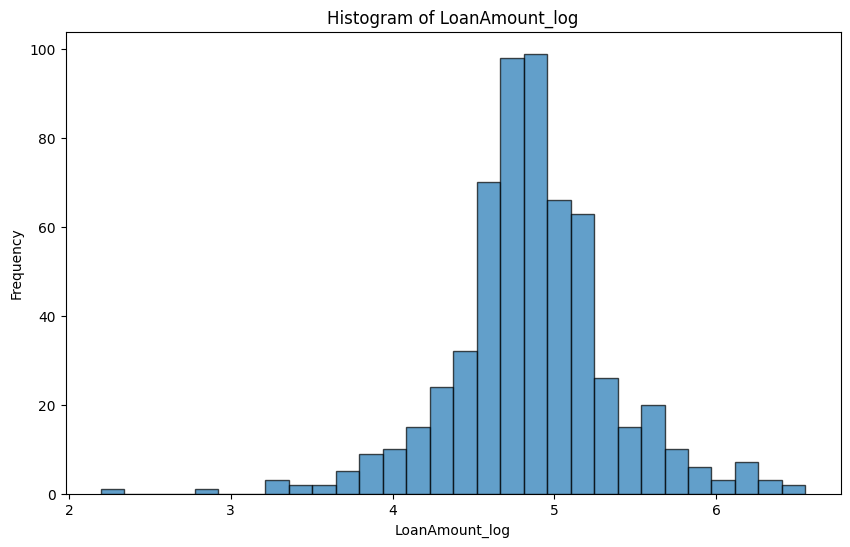

In [6]:
# Plot a histogram of the 'LoanAmount_log' column
plt.figure(figsize=(10, 6))
plt.hist(df['LoanAmount_log'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of LoanAmount_log')
plt.xlabel('LoanAmount_log')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])

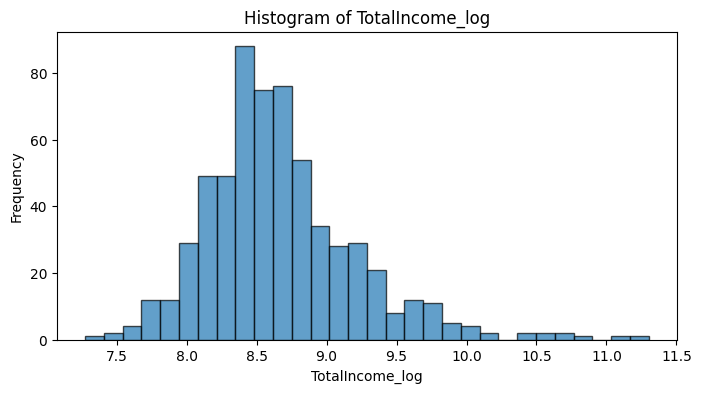

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(df['TotalIncome_log'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of TotalIncome_log')
plt.xlabel('TotalIncome_log')
plt.ylabel('Frequency')
plt.show()

In [9]:
# List of columns to fill missing values with their modes
columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

# Loop through each column and fill missing values with the mode
for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Calculate the mode of the column
    df[column].fillna(mode_value, inplace=True)  # Fill NaNs with the mode

# Check the DataFrame to ensure missing values have been filled
print(df[columns_to_fill].isnull().sum())


Gender              0
Married             0
Dependents          0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
dtype: int64


In [10]:
# Fill missing values in 'LoanAmount' column with the mean of the column
loan_amount_mean = df['LoanAmount'].mean()
df['LoanAmount'].fillna(loan_amount_mean, inplace=True)

# Fill missing values in 'LoanAmount_log' column with the mean of the column
loan_amount_log_mean = df['LoanAmount_log'].mean()
df['LoanAmount_log'].fillna(loan_amount_log_mean, inplace=True)

# Check the DataFrame to ensure missing values have been filled
print(df[['LoanAmount', 'LoanAmount_log']].isnull().sum())


LoanAmount        0
LoanAmount_log    0
dtype: int64


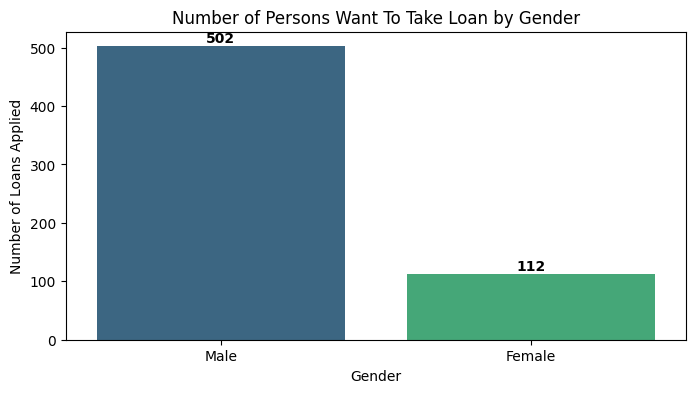

In [11]:
# Count the number of loans taken by gender
loan_count_by_gender = df['Gender'].value_counts().reset_index()
loan_count_by_gender.columns = ['Gender', 'Count']

# Create the bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Gender', y='Count', data=loan_count_by_gender, palette='viridis', hue='Gender', dodge=False, legend=False)

# Add the exact number on the top of each bar
for i, v in enumerate(loan_count_by_gender['Count']):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Set plot title and labels
plt.title('Number of Persons Want To Take Loan by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Loans Applied')
plt.show()

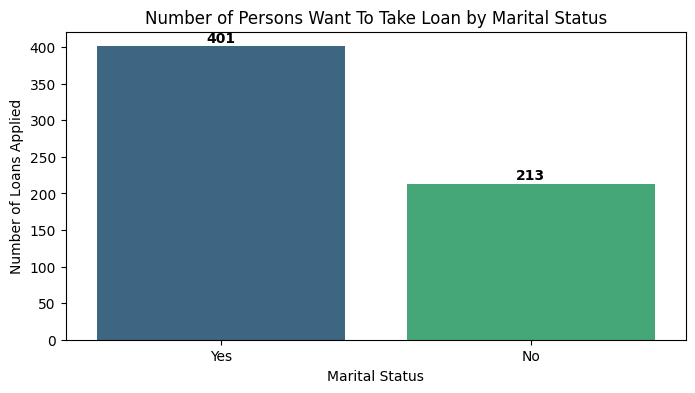

In [12]:
# Count the number of loans taken by marital status
loan_count_by_marital_status = df['Married'].value_counts().reset_index()
loan_count_by_marital_status.columns = ['Married', 'Count']

# Create the bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Married', y='Count', data=loan_count_by_marital_status, palette='viridis', hue='Married', dodge=False, legend=False)

# Add the exact number on the top of each bar
for i, v in enumerate(loan_count_by_marital_status['Count']):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Set plot title and labels
plt.title('Number of Persons Want To Take Loan by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Loans Applied')
plt.show()


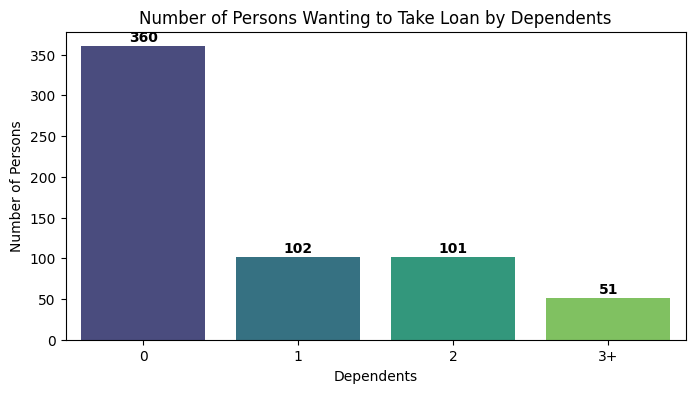

In [13]:
# Count the number of persons who want to take the loan based on dependents
loan_count_by_dependents = df['Dependents'].value_counts().reset_index()
loan_count_by_dependents.columns = ['Dependents', 'Count']

# Create the bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Dependents', y='Count', data=loan_count_by_dependents, palette='viridis', hue='Dependents', dodge=False, legend=False)

# Add the exact number on the top of each bar
for i, v in enumerate(loan_count_by_dependents['Count']):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Set plot title and labels
plt.title('Number of Persons Wanting to Take Loan by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of Persons')
plt.show()


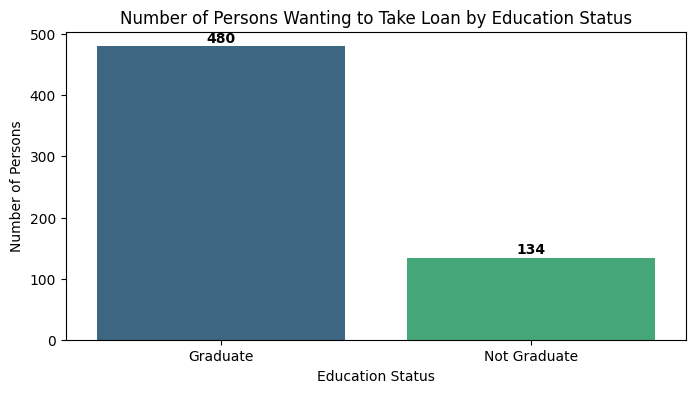

In [14]:
# Count the number of persons who want to take the loan based on education status
loan_count_by_education = df['Education'].value_counts().reset_index()
loan_count_by_education.columns = ['Education', 'Count']

# Create the bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Education', y='Count', data=loan_count_by_education, palette='viridis', hue='Education', dodge=False, legend=False)

# Add the exact number on the top of each bar
for i, v in enumerate(loan_count_by_education['Count']):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Set plot title and labels
plt.title('Number of Persons Wanting to Take Loan by Education Status')
plt.xlabel('Education Status')
plt.ylabel('Number of Persons')
plt.show()


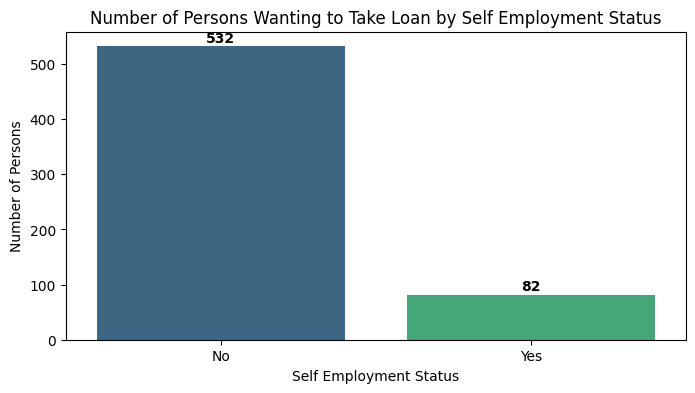

In [15]:
# Count the number of persons who want to take the loan based on self-employment status
loan_count_by_self_employed = df['Self_Employed'].value_counts().reset_index()
loan_count_by_self_employed.columns = ['Self_Employed', 'Count']

# Create the bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Self_Employed', y='Count', data=loan_count_by_self_employed, palette='viridis', hue='Self_Employed', dodge=False, legend=False)

# Add the exact number on the top of each bar
for i, v in enumerate(loan_count_by_self_employed['Count']):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Set plot title and labels
plt.title('Number of Persons Wanting to Take Loan by Self Employment Status')
plt.xlabel('Self Employment Status')
plt.ylabel('Number of Persons')
plt.show()


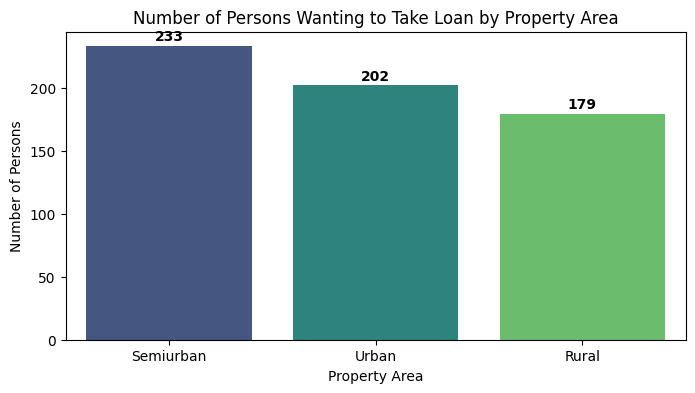

In [16]:
# Count the number of persons who want to take the loan based on property area
loan_count_by_property_area = df['Property_Area'].value_counts().reset_index()
loan_count_by_property_area.columns = ['Property_Area', 'Count']

# Create the bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Property_Area', y='Count', data=loan_count_by_property_area, palette='viridis', hue='Property_Area', dodge=False, legend=False)

# Add the exact number on the top of each bar
for i, v in enumerate(loan_count_by_property_area['Count']):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# Set plot title and labels
plt.title('Number of Persons Wanting to Take Loan by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Number of Persons')
plt.show()


In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the input and output columns
input_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
output_column = 'Loan_Status'

# Define X and y
X = df[input_columns]
y = df[output_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical columns to string type
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for column in categorical_columns:
    X_train[column] = X_train[column].astype(str)
    X_test[column] = X_test[column].astype(str)

# Convert output column to string type
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical features in X_train and X_test
for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Apply label encoding to y_train and y_test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Check the transformed data
print(X_train.head())
print(y_train[:5])


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
83        1        1           0          0              0             6000   
90        1        1           0          0              0             2958   
227       1        1           2          0              0             6250   
482       1        1           0          0              0             2083   
464       1        0           0          0              0             4166   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
83              2250.0       265.0             360.0             1.0   
90              2900.0       131.0             360.0             1.0   
227             1695.0       210.0             360.0             1.0   
482             3150.0       128.0             360.0             1.0   
464                0.0        98.0             360.0             0.0   

     Property_Area  
83               1  
90               1  
227              1  
482     

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Define the numerical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Apply the scaler to the numerical columns in X_train and X_test
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Check the transformed data
print(X_train.head())
print(X_test.head())


     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
83        1        1           0          0              0         0.083915   
90        1        1           0          0              0        -0.429338   
227       1        1           2          0              0         0.126095   
482       1        1           0          0              0        -0.576970   
464       1        0           0          0              0        -0.225522   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
83            0.180667    1.349992          0.287611        0.407763   
90            0.385430   -0.204748          0.287611        0.407763   
227           0.005831    0.711852          0.287611        0.407763   
482           0.464185   -0.239556          0.287611        0.407763   
464          -0.528127   -0.587632          0.287611       -2.452404   

     Property_Area  
83               1  
90               1  
227              1  
482     

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifiers
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

# List of classifiers for easy iteration
classifiers = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_clf,
    'Decision Tree': dt_clf,
    'K-Neighbors': knn_clf
}

# Dictionary to store accuracy results
accuracy_results = {}

# Train and predict using each classifier
for clf_name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict the results for the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy in the dictionary
    accuracy_results[clf_name] = accuracy

# Print accuracy results for each model
for clf_name, accuracy in accuracy_results.items():
    print(f'{clf_name} Accuracy: {accuracy:.4f}')


Logistic Regression Accuracy: 0.7886
Random Forest Accuracy: 0.7642
Decision Tree Accuracy: 0.6992
K-Neighbors Accuracy: 0.7561


In [21]:
# Re-initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to string type and apply label encoding
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

# Apply label encoding to the output variable y
y = label_encoder.fit_transform(y.astype(str))


C:\Users\aditya\AppData\Local\Temp\ipykernel_1476\3917968439.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column].astype(str))
C:\Users\aditya\AppData\Local\Temp\ipykernel_1476\3917968439.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column].astype(str))
C:\Users\aditya\AppData\Local\Temp\ipykernel_1476\3917968439.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [22]:
from sklearn.model_selection import cross_val_score

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation for each classifier
for clf_name, clf in classifiers.items():
    # Calculate cross-validation scores (using 5-fold cross-validation)
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    # Store the mean cross-validation score in the dictionary
    cv_results[clf_name] = cv_scores.mean()

# Print cross-validation results for each model
for clf_name, cv_score in cv_results.items():
    print(f'{clf_name} Cross-Validation Accuracy: {cv_score:.4f}')


C:\Users\aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Cross-Validation Accuracy: 0.8062
Random Forest Cross-Validation Accuracy: 0.7883
Decision Tree Cross-Validation Accuracy: 0.6987
K-Neighbors Cross-Validation Accuracy: 0.6140


In [23]:
from sklearn.metrics import classification_report
# Train the models and print classification reports
for clf_name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict the results for the test set
    y_pred = clf.predict(X_test)
    
    # Generate the classification report
    print(f'Classification Report for {clf_name}:')
    print(classification_report(y_test, y_pred))
    print('-' * 80)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

--------------------------------------------------------------------------------
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

--------------------------------------------------------------------------------
Classification Report for Decision Tree:
              precision    recall  f1-score   support



In [24]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the classes after resampling
print(f"Original y_train distribution: {pd.Series(y_train).value_counts()}")
print(f"Resampled y_train distribution: {pd.Series(y_train_resampled).value_counts()}")


Original y_train distribution: 1    342
0    149
Name: count, dtype: int64
Resampled y_train distribution: 0    342
1    342
Name: count, dtype: int64


In [26]:
# Train the models and print classification reports with resampled data
for clf_name, clf in classifiers.items():
    # Train the model on the resampled data
    clf.fit(X_train_resampled, y_train_resampled)
    
    # Predict the results for the original test set
    y_pred = clf.predict(X_test)
    
    # Generate the classification report
    print(f'Classification Report for {clf_name} after SMOTE:')
    print(classification_report(y_test, y_pred))
    print('-' * 80)


Classification Report for Logistic Regression after SMOTE:
              precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.76      0.89      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.74      0.75      0.73       123

--------------------------------------------------------------------------------
Classification Report for Random Forest after SMOTE:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        43
           1       0.77      0.82      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.68      0.69       123
weighted avg       0.72      0.72      0.72       123

--------------------------------------------------------------------------------
Classification Report for Decision Tree after SMOTE:
              preci

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
116 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        43
           1       0.77      0.88      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.74      0.75      0.74       123



In [28]:
from sklearn.ensemble import StackingClassifier
# Define the base models
base_models = [
    ('rf', best_rf),  # Best Random Forest model from Grid Search
    ('lr', LogisticRegression())
]

# Define the meta-model (can be any classifier, often a simple model like Logistic Regression)
meta_model = LogisticRegression()

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [29]:
# Train the stacking model on the resampled training data
stacking_clf.fit(X_train_resampled, y_train_resampled)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [30]:
# Predict the results for the original test set
y_pred = stacking_clf.predict(X_test)

# Generate the classification report
print('Classification Report for Stacking Classifier:')
print(classification_report(y_test, y_pred))


Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59        43
           1       0.77      0.89      0.83        80

    accuracy                           0.76       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.75      0.76      0.74       123



In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the Random Forest model
importances = best_rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


C:\Users\aditya\AppData\Local\Temp\ipykernel_1476\3943726357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


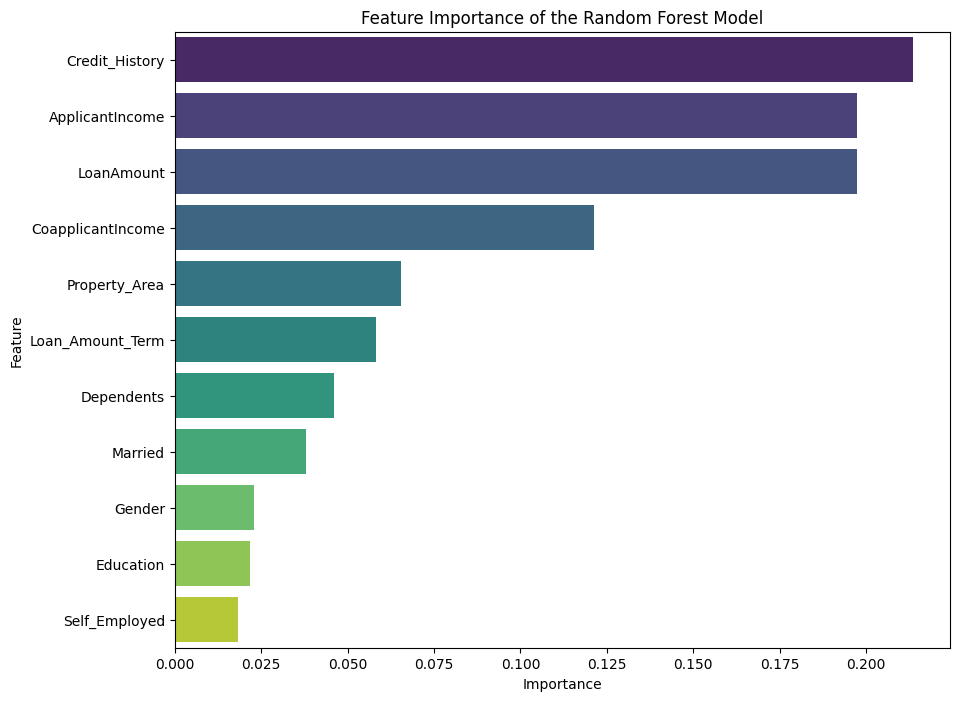

In [33]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title('Feature Importance of the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [35]:
import pickle

# Define the file path
file_path = r'C:\Users\aditya\Loan Approval model ML\Loan approval model\random_forest_model.pkl'

# Save the Random Forest model to the specified file path
with open(file_path, 'wb') as model_file:
    pickle.dump(best_rf, model_file)


In [36]:
import pickle

# Define the file path
file_path = r'C:\Users\aditya\Loan Approval model ML\Loan approval model\random_forest_model.pkl'

# Load the Random Forest model from the specified file path
with open(file_path, 'rb') as model_file:
    model = pickle.load(model_file)
